<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

### Web Scraping Job Postings
---
## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---


In [54]:
import pickle
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
output = pickle.load(open("./datasets/Consolidate.pickle", 'rb'))

In [3]:
output

,company,country,description,location,review,salary,star,title
10,UMeKang,Singapore,"Use all available data, undertaking data disco...",Singapore,None,"$9,000 - $11,000 a month",None,Data Scientist
3,Cresco Data Pte Ltd,Singapore,Data Scientist Duties:. We are looking for a D...,Tanjong Pagar,None,"$3,500 - $4,500 a month",None,Data Scientist
8,iKas International (Asia) Pte Ltd,Singapore,"Using data modeling, linear regression, statis...",Singapore,None,"$7,000 - $9,000 a month",None,Data Scientist
6,Vault Dragon,Singapore,Assist the Data Scientist in deploying Machine...,Singapore,None,"$4,000 - $6,000 a month",None,Data Engineer
5,TSA Solutions,Singapore,Data Scientist - Summary*. Bachelor in degree ...,Pasir Panjang,None,"$4,200 a month",None,Data Scientist
4,EkkBaz.com,Singapore,We are looking for a Data Scientist that will ...,Ang Mo Kio,None,"$1,000 - $2,000 a month",None,Data Scientist Intern
10,6Estates Pte Ltd,Singapore,Assist to organise unstructured data on websit...,Singapore,None,"$1,000 a month",None,Data Crawling Engineer Intern
5,Transforma,Singapore,Develop and implement algorithms for 3D recons...,Singapore,None,"$3,500 - $5,500 a month",None,Robot Software Engineer - Image Processing
10,Shentilium Technologies,Singapore,"Perform ETL, data cleaning and data crowdsourc...",Singapore,None,"$1,000 a month",None,Data Visualization and Wrangling Intern
10,TSA Solutions,Singapore,Knowledge of SQL for retrieving data. Support ...,Singapore,None,"$3,000 - $4,300 a month",None,Data Analyst


In [4]:
df = pd.DataFrame(output)

In [5]:
df.isnull().sum()

company           8
country           0
description       0
location          0
review         2303
salary            0
star           2303
title             0
dtype: int64

Dropping unnecessary features 'review' and 'star'.

In [6]:
df.drop('review', axis=1, inplace=True)
df.drop('star', axis=1, inplace=True)

In [7]:
df.isnull().sum()

company        8
country        0
description    0
location       0
salary         0
title          0
dtype: int64

Dropping missing values in company.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

company        0
country        0
description    0
location       0
salary         0
title          0
dtype: int64

In [10]:
df.shape

(4335, 6)

Dropping all duplicated in the feature 'description'.

In [11]:
df.drop_duplicates(['description'], keep='last', inplace=True)

In [12]:
df.shape

(4033, 6)

Dropping all records that consists of weekly or hourly pay.

In [13]:
df = df[~df.salary.str.contains("hour")]
df = df[~df.salary.str.contains("week")]
df = df[~df.salary.str.contains("day")]

In [14]:
df.shape

(3397, 6)

Removing any commas and dollar signs.

In [15]:
regex = re.compile(r'[\d\-\.]+')
df.salary = df.salary.map(lambda x: ''.join(regex.findall(x)))

Averaging the salaries that has a range.

In [16]:
df.salary = [float(i) if i.replace('.','').isdigit() == True else np.mean([float(i.split('-')[0]),float(i.split('-')[1])]) for i in df.salary.values]

In [17]:
df['salary'].value_counts()

40000.0     135
30000.0     121
35000.0     115
45000.0      95
50000.0      84
27500.0      68
25000.0      67
37500.0      63
55000.0      56
70000.0      55
90000.0      52
32500.0      50
60000.0      47
75000.0      47
80000.0      46
85000.0      45
100000.0     45
42500.0      45
65000.0      42
52500.0      36
20000.0      34
22000.0      32
22500.0      30
24000.0      30
47500.0      30
110000.0     25
29000.0      24
23000.0      23
28000.0      23
34000.0      22
           ... 
60500.0       1
45464.0       1
48900.0       1
34789.5       1
107259.0      1
16170.0       1
36271.0       1
67321.5       1
7839.5        1
102672.0      1
58500.0       1
101936.0      1
41146.0       1
71014.0       1
109000.0      1
31159.5       1
39300.5       1
23433.0       1
28432.0       1
6500.0        1
24514.0       1
62595.5       1
87700.0       1
68041.5       1
102150.0      1
104708.5      1
77571.5       1
6100.5        1
124675.0      1
35327.5       1
Name: salary, Length: 86

In [18]:
df.reset_index(drop=True, inplace=True)

---

## Factors That Impact Salary

In [53]:
len(df.salary)

3397

In [37]:
print "The median salary is $", np.median(df.salary)
print "The mean salary is $", round(np.mean(df.salary))

The median salary is $ 40000.0
The mean salary is $ 50106.0


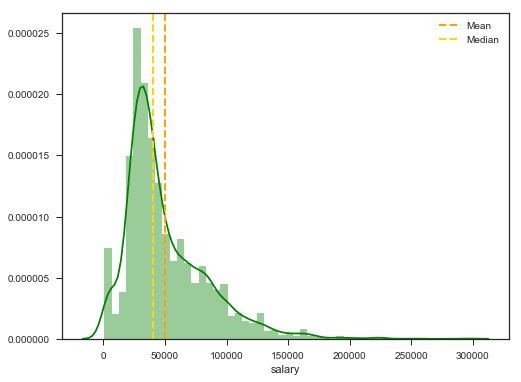

In [51]:
sns.set_style(style='ticks', rc=None)
fig = plt.figure(figsize=(8,6))

sns.distplot(df.salary, kde=True, color='green')

plt.axvline(round(np.mean(df.salary),2), color='orange', label="Mean", linestyle='dashed', linewidth=2)
plt.axvline(np.median(df.salary), color='gold', label="Median", linestyle='dashed', linewidth=2)
plt.legend();

plt.show(1)

The goal of this analysis is to predict a binary variable — whether the salary is above or below the median value. 

We create a new binary variable that equals 1.0 when the salary is above the median which translates to being high, and 0.0 when it is below the median which translates to being low.

In [56]:
#creating new target variable "above_med_sal" where 0 == below or equal to the median, and 1 == above the median; any postings without salary information will have NaN values for this variable
df["above_med_sal"] = np.nan
df.ix[df["salary"] > df["salary"].median(), "above_med_sal"] = 1
df.ix[df["salary"] <= df["salary"].median(), "above_med_sal"] = 0
df.tail()

/Users/Gar-eeee-eet/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,company,country,description,location,salary,title,above_med_sal
3392,2XM Finance,Australia,Permanent position for an experienced Business...,Perth WA,87500.0,Business Development Analyst | Perth CBD | $90K,1.0
3393,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...",Mandurah WA,64000.0,ICT Business Analyst,1.0
3394,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,Mandurah WA,65000.0,Developer Programmer,1.0
3395,Deimos Technology Pty Ltd,Australia,"Non-ICT Business Analysts (for example, Manage...",Mandurah WA,64000.0,ICT Business Analyst,1.0
3396,Deimos Technology Pty Ltd,Australia,Confirms project requirements by reviewing pro...,Mandurah WA,65000.0,Developer Programmer,1.0


Creating the train test split with the salary data.

In [57]:
#splitting out our predictor variables from the salary data
sal_X = df.iloc[:,0:len(df.columns)-1]

#sal_y will be above_med_sal, creating as a dataframe
sal_y = pd.DataFrame(df["above_med_sal"])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.2, stratify=sal_y, random_state=74)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

For each of the features in X_train, I utilized the count vectorizer from scikit-learn to examine the frequencies of n-grams associated with above-median and below-median salary jobs. 

I then generated ratios examining the relative appearance of each n-gram in above- vs. below-median salary positions. The higher the ratio above 1.0, the more strongly associated the n-gram is with above-median salaries; the lower the ratio is below 1.0, the more strongly associated the n-gram is with below-median salaries. Ratios closer to 1.0 indicate that n-grams appeared relatively as frequently in above-median jobs as they did in below-median jobs, indicating little predictive power.

For this analysis, I set my n-gram range from 1–3, meaning our analysis will examine consecutive strings of between one and three words. I was also only interested in words that appeared in at least 5% of postings, to cut out sparsely represented words that wouldn’t have helpful discriminating power.


In [90]:
#initializing count vectorizer to examine text-based data for logistic regression. 
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',ngram_range=(1, 3), min_df = .05)


Examining job titles in the dataset.

In [107]:

df.title.value_counts()[:15]

Data Analyst                     118
Data Scientist                   101
Business Analyst                  58
Senior Data Scientist             21
Financial Analyst                 17
Analyst                           15
Insight Analyst                   14
Finance Analyst                   14
Reporting Analyst                 13
Marketing Analyst                 12
MI Analyst                        11
Business Intelligence Analyst     11
Data Engineer                     11
Pricing Analyst                   10
Quantitative Analyst              10
Name: title, dtype: int64

In [91]:
#fitting count vectorizer to job title
cvec.fit(X_train["title"])

#transforming job_title data into job_train
job_train = pd.DataFrame(cvec.transform(X_train["title"]).todense(),
                       columns=cvec.get_feature_names())


In [92]:
word_observe = pd.concat([job_train, y_train], axis=1)

word_observe.head()

,analyst,business,business analyst,data,data analyst,data scientist,research,scientist,senior,above_med_sal
0,0,0,0,0,0,0,0,0,0,1.0
1,1,0,0,0,0,0,0,0,0,0.0
2,1,0,0,1,1,0,0,0,0,0.0
3,1,0,0,1,0,0,0,0,1,1.0
4,1,0,0,0,0,0,0,0,0,0.0


Observing most common job title n-grams for both above and below median salaries

In [93]:
for i in xrange(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print i, "most common words"
    
    cw = word_count.sort_values(ascending = False).head(20)
    print cw
    
    print

0 most common words
analyst             967.0
data                329.0
data analyst        204.0
scientist           134.0
business            116.0
research             99.0
senior               79.0
business analyst     67.0
data scientist       50.0
above_med_sal         0.0
dtype: float64

1 most common words
above_med_sal       1279.0
analyst              644.0
data                 446.0
scientist            294.0
data scientist       233.0
senior               204.0
business             130.0
data analyst         101.0
research              89.0
business analyst      86.0
dtype: float64



We can get a ballpark view of some terms like "analyst" appearing more frequently in below than median jobs. Terms like "data scientist" or "scientist" appearing more freqently in higher than median jobs.

Seeing the ratio of these terms' appearance will make it easier to discern the discriminatory power of the n-grams.

In [77]:
#creating separate lists of the top appearing words so that these can be combined and compared to create ratios of appearances in above-median vs. below-median salaries

word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)

#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]
word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal            inf
data scientist      4.660000
senior              2.582278
scientist           2.194030
data                1.355623
business analyst    1.283582
business            1.120690
research            0.898990
analyst             0.665977
data analyst        0.495098
Name: above_below_ratio, dtype: float64

In [123]:
X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.2, stratify=sal_y, random_state=74)


In [124]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print "Score:", logreg.score(X_train, y_train)     
scores = cross_val_score(logreg, X_train, y_train, cv=6)
print "Cross-validated scores:", scores


UnicodeEncodeError: 'decimal' codec can't encode character u'\u2013' in position 39: invalid decimal Unicode string